# ** Providing data-driven suggestions for HR**

# **PACE stages**


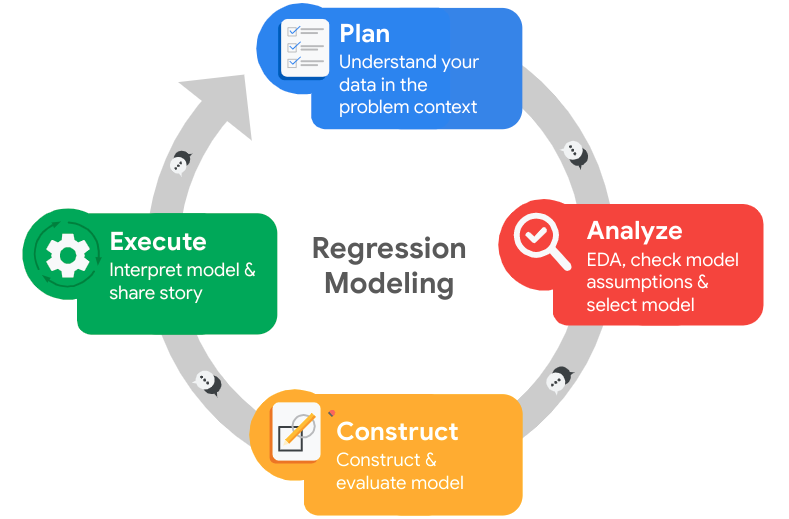

## **Pace: Plan**


### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?



1. Salifort Motors HR department and leadership team ae stakeholders for this project.


2. Trying to Analyze the reason why employees are leaving the company and how we can minimize it.


3. Employees who are spending more monthly hours on an average or working on more projects tends to leave the company.



## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree

### Load dataset


In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data

df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

In [5]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values

df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Dataset doesn't contain any null values.

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates

df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed

df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed

df.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

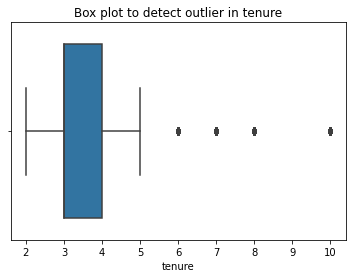

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df['tenure'])
plt.title('Box plot to detect outlier in tenure')
plt.show()

In [12]:
# Determine the number of rows containing outliers

percentile25 = df['tenure'].quantile(0.25)
percentile75 = df['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

tenure_outlier = df[(df['tenure']> upper_limit) | (df['tenure'] < lower_limit)]

print("Number of rows in the data containing outliers in `tenure`:", len(tenure_outlier))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print("Number of peoples who left vs stayed are : \n{}".format(df['left'].value_counts()))

print()
# Get percentages of people who left vs. stayed
print("Percentage of people who left vs stayed are  : \n{}".format(df['left'].value_counts(normalize=True)*100))


Number of peoples who left vs stayed are : 
0    10000
1     1991
Name: left, dtype: int64

Percentage of people who left vs stayed are  : 
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

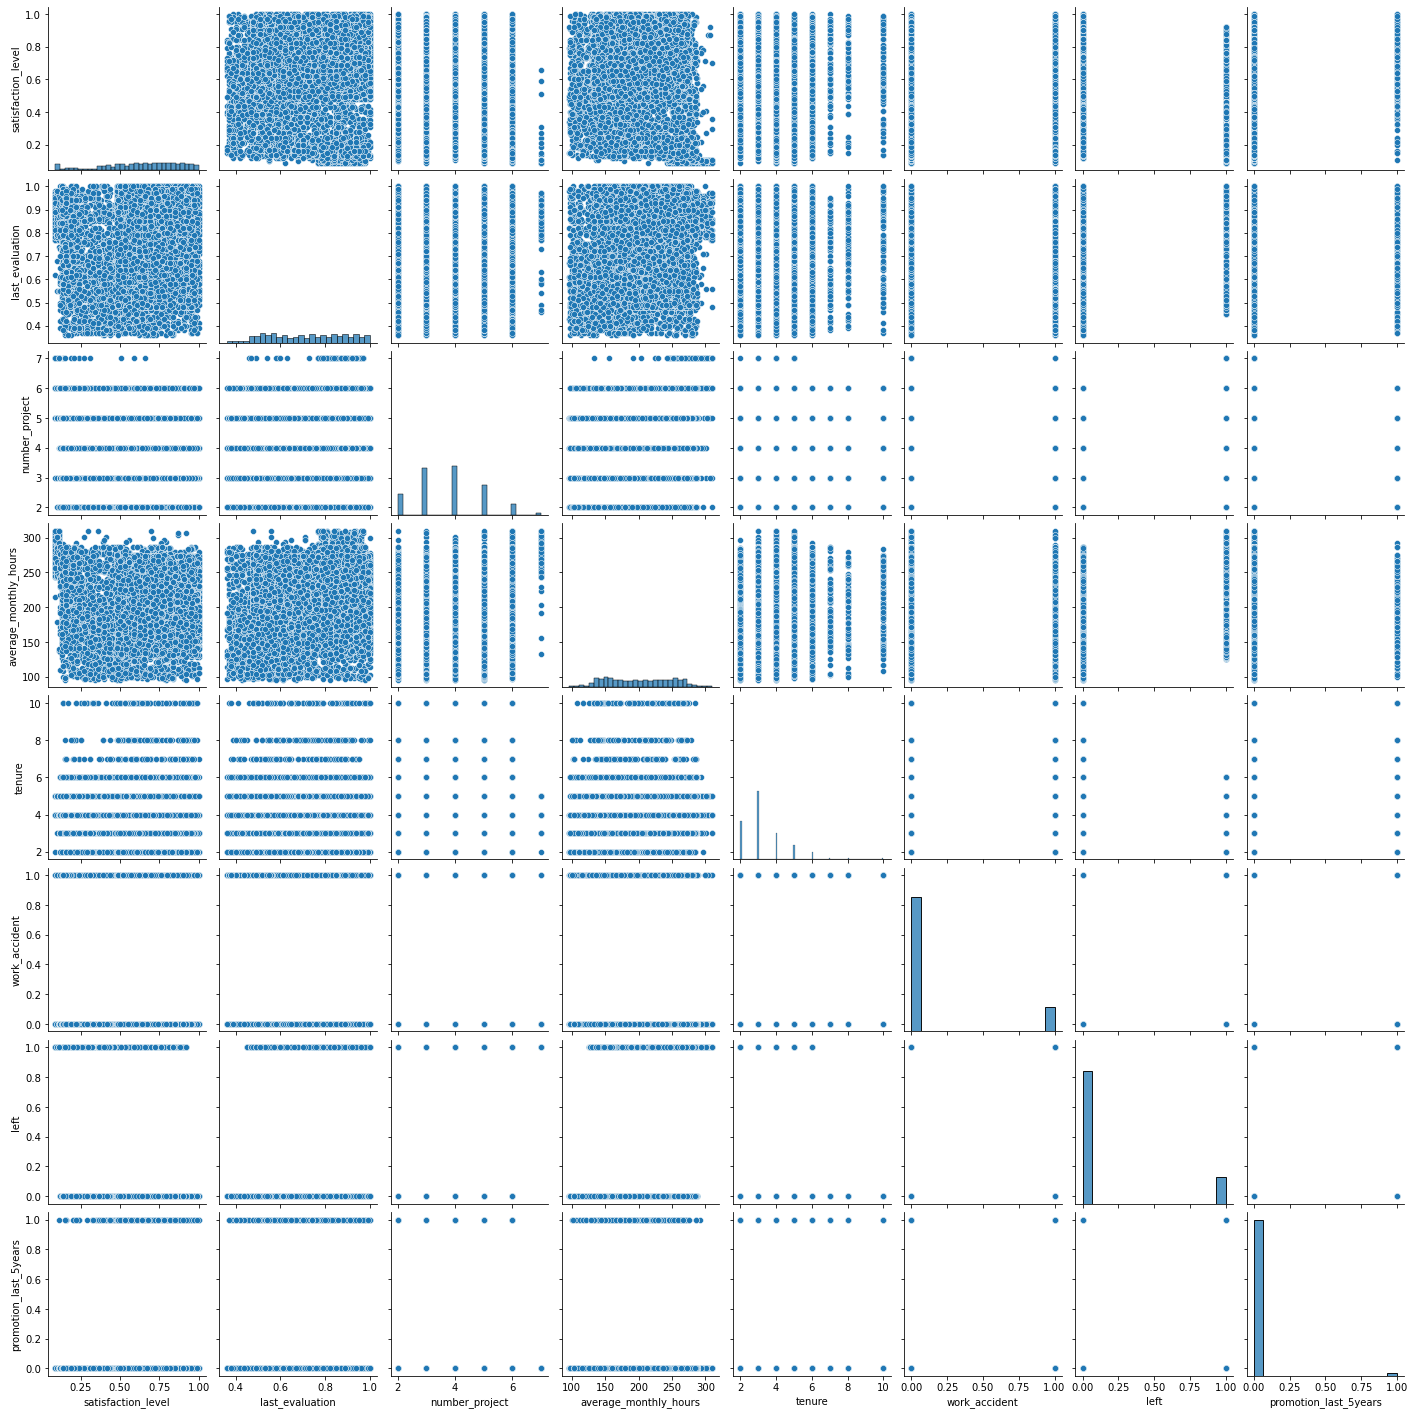

In [14]:
# Create a plot as needed

sns.pairplot(df)

Firstly, we will inspect number of projects.

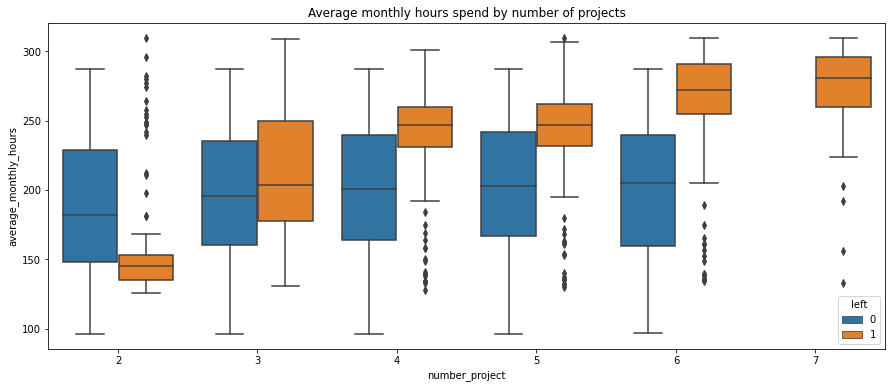

In [15]:
# Create a plot to examine relation between number of projects and average monthly hours
plt.figure(figsize = (15,6))
sns.boxplot(x = df['number_project'], y = df['average_monthly_hours'],hue = df['left'])
plt.title("Average monthly hours spend by number of projects")
plt.show()

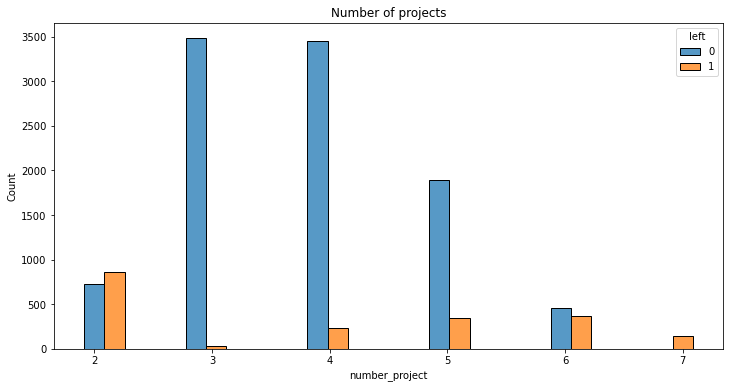

In [16]:
# Create a plot to examine count of  number of projects
plt.figure(figsize=(12,6))
sns.histplot(x = df['number_project'], hue = df['left'], multiple='dodge', shrink=2)
plt.title("Number of projects")
plt.show()

From above two graphs, we can say that : 

1. Employees who work on 2 projects  and left the company worked for less time than who stayed, it may be possible that they were fired because they are not working much.


2. On the other hand, employees who were working on 6 and 7 projects and spending much more time then others tends to leave the company. Everyone who were working on 7 number of projects tends to leave the company.


3. The optimal number of projects where employees left number is small is 3 and 4 because the number of employess leaving in this is very small.


4. As the number of projects increases, the employees who work for more hours tends to leave the company then who stayed.Its seems that comapany is putting lot of pressure on employees and employees are doing overtime to complete this due to which they take decision to leave the company.


Now, we will inspect tenure variable in relation with others.

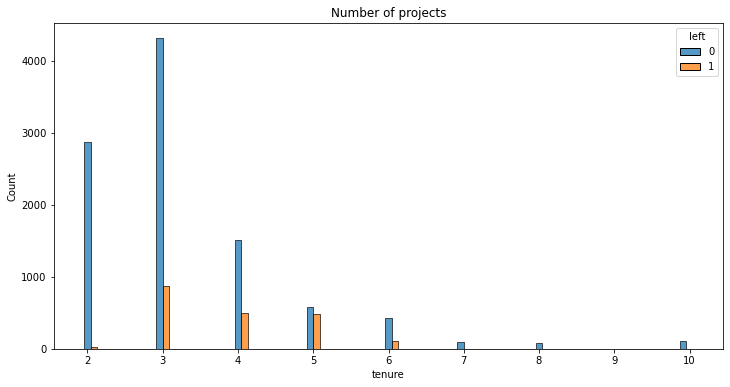

In [17]:
# Create a plot as needed
plt.figure(figsize=(12,6))
sns.histplot(x = df['tenure'], hue = df['left'], multiple='dodge', shrink=2)
plt.title("Number of projects")
plt.show()

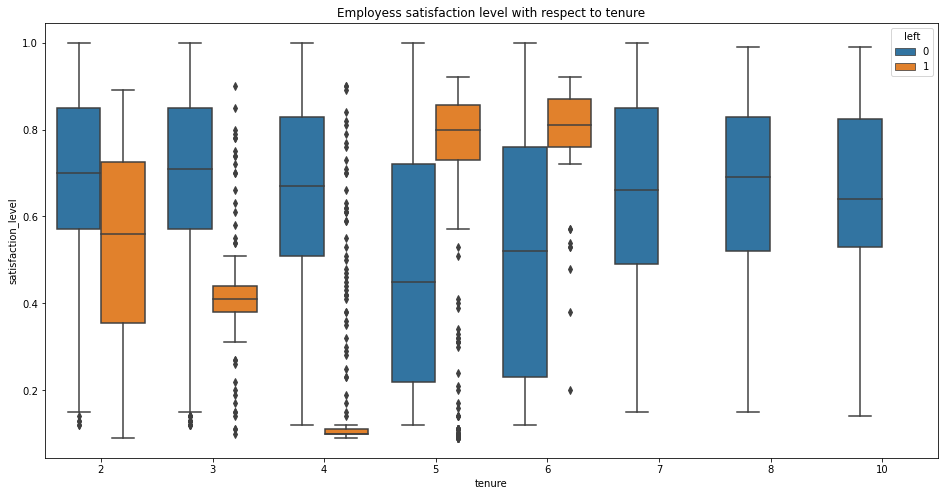

In [18]:
# Create a plot as needed
plt.figure(figsize = (16,8))
sns.boxplot(x= df['tenure'], y = df['satisfaction_level'], hue = df['left'])
plt.title("Employess satisfaction level with respect to tenure")
plt.show()

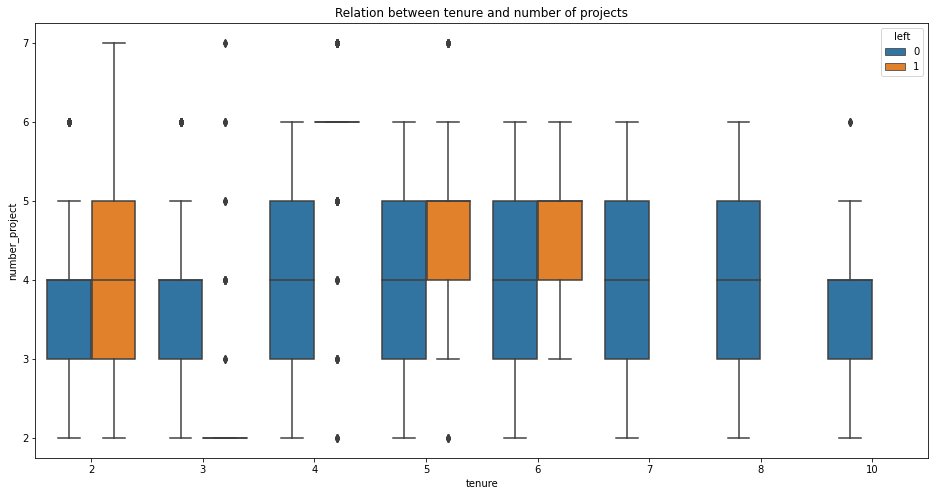

In [19]:
plt.figure(figsize = (16,8))
sns.boxplot(x= df['tenure'], y = df['number_project'], hue = df['left'])
plt.title("Relation between tenure and number of projects")
plt.show()

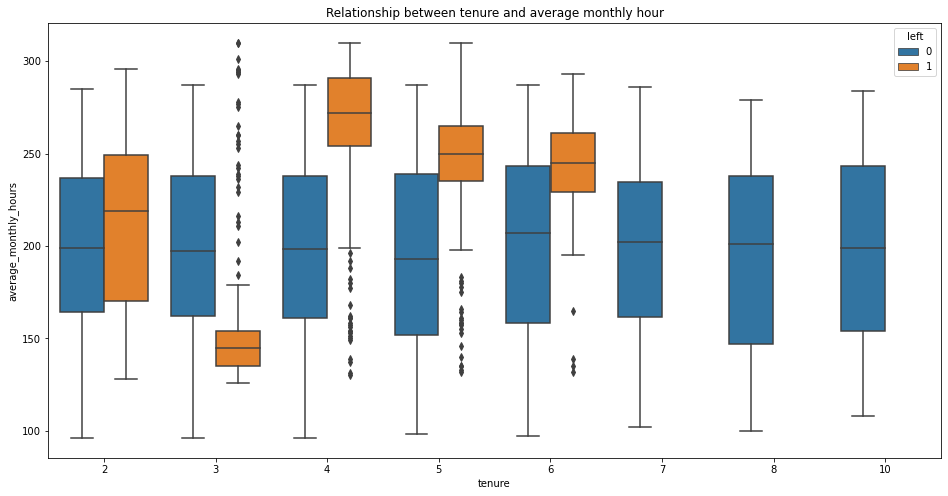

In [20]:
plt.figure(figsize = (16,8))
sns.boxplot(x= df['tenure'], y = df['average_monthly_hours'], hue = df['left'])
plt.title("Relationship between tenure and average monthly hour")
plt.show()

From above two graphs related to tenure we can say :

1. The data suggests that employees with tenures of 7 years or higher are less likely to leave the company. Their high satisfaction levels may be attributed to an optimal workload of 3 to 5 projects and an average monthly working time of less than 250 hours.

2. In contrast, employees with a tenure of 4 years exhibited the lowest satisfaction levels. This may be due to their demanding workload, involving more than 250 hours per month and working on 6 projects.

3. Early employee departures are potentially linked to increased work pressure, as those with shorter tenures often handle 3 to 5 projects and longer working hours, which may lead to reduced job satisfaction and subsequent resignations.

Checking weather the work accident is the factor for leaving the job or not.

In [21]:
# Create a plot as needed
df['work_accident'].value_counts(normalize= True)*100

0    84.571762
1    15.428238
Name: work_accident, dtype: float64

Since work accidents are relatively rare within the company, it may not have a substantial impact on the circumstances surrounding employee departures.

In [22]:
# Create a plot as needed
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Now lets check for last evaluation

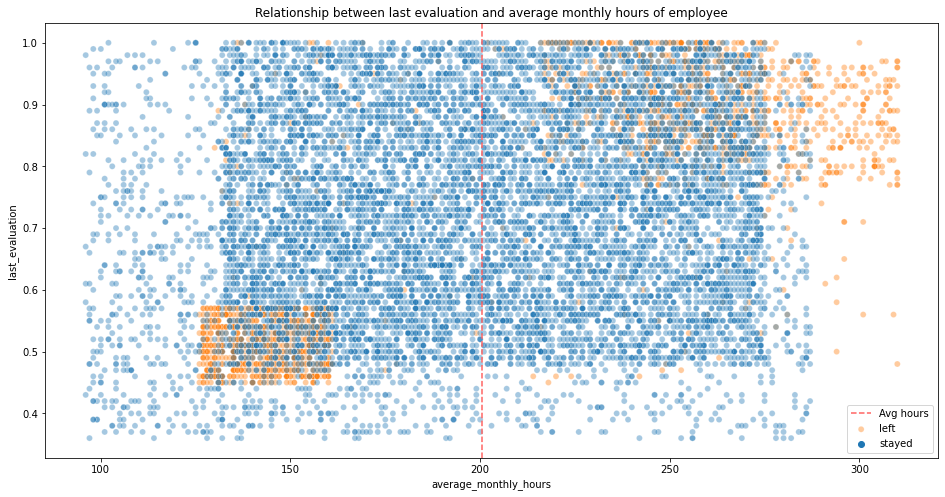

In [23]:
# Create a plot as needed
plt.figure(figsize = (16,8))
sns.scatterplot(x= df['average_monthly_hours'], y = df['last_evaluation'], hue = df['left'], alpha = 0.4)
plt.title("Relationship between last evaluation and average monthly hours of employee")
plt.axvline(x=df['average_monthly_hours'].mean(), color='#ff6361', label='Avg hours', ls='--')
plt.legend(labels=['Avg hours', 'left', 'stayed'])
plt.show()

There are two categories of employees who leaves the company :
1. Employees with higher evaluation score but working for more hours which tends to leave company.

2. Employees with lower evaluation and low average monthly working hour.

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

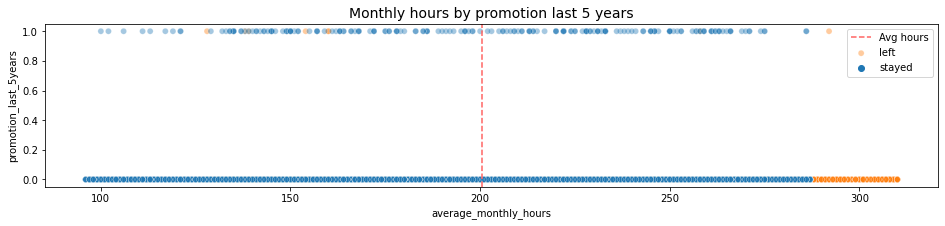

In [24]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=df['average_monthly_hours'].mean(), color='#ff6361', label='Avg hours', ls='--')
plt.legend(labels=['Avg hours', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')

From above plot we can say that :
1. Very few employees who were promoted in the last five years left.


2. Very few employees who worked the most hours were promoted.


3. All of the employees who left were working the longest hours.

Now, lets inspect how department affects othet variables.

In [25]:
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

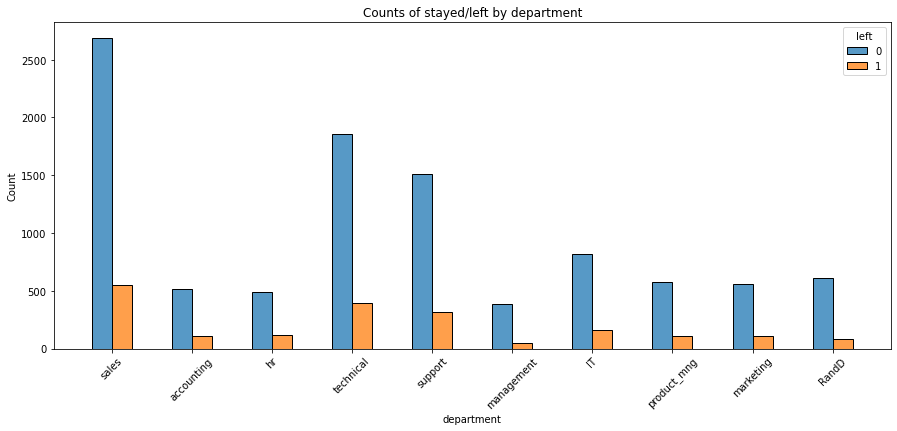

In [26]:
plt.figure(figsize=(15,6))
sns.histplot(x = df['department'], hue = df['left'], multiple='dodge', shrink=0.5)
plt.title("Counts of stayed/left by department")
plt.xticks(rotation='45')
plt.show()

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

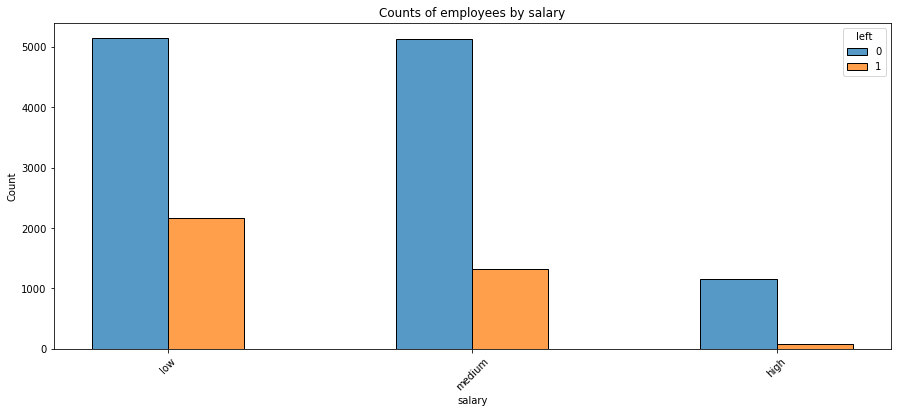

In [27]:
plt.figure(figsize=(15,6))
sns.histplot(x = df0['salary'], hue = df0['left'], multiple = 'dodge', shrink=0.5)
plt.title("Counts of employees by salary")
plt.xticks(rotation='45')
plt.show()

Employees having lower salary tends to leave company compared to others

Text(0.5, 1.0, 'Correlation Heatmap')

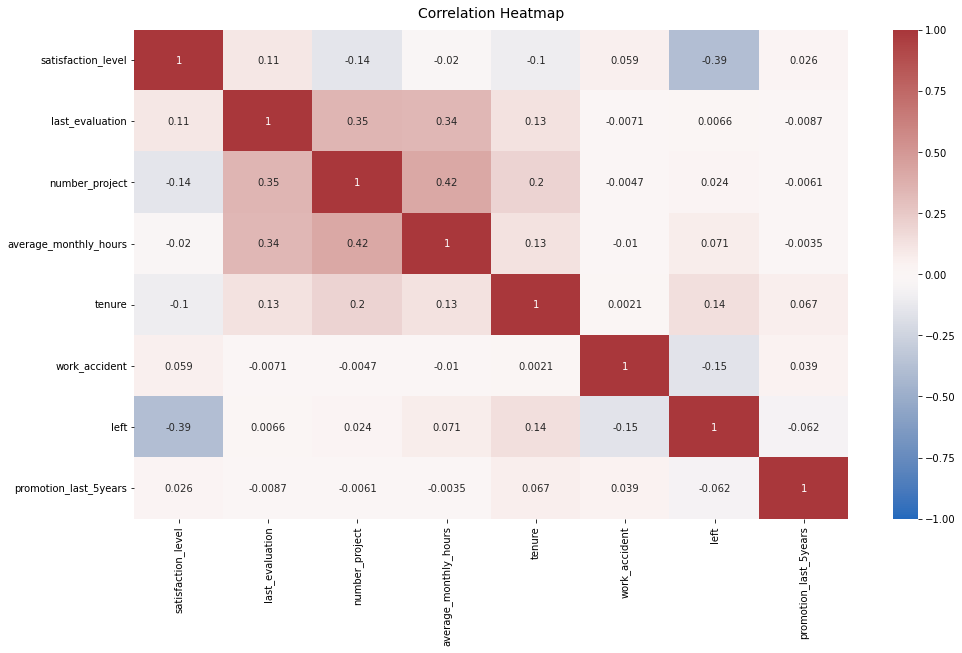

In [28]:
# Creating correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

### Insights

The correlation heatmap confirms that the number of projects, average_monthly_hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## **Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Results and Evaluation


- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

As target variable is categorical variable weather the employee will eave the company or not. The type of prediction task is Classification.

### Identify the types of models most appropriate for this task.

Since the target variable to predict is categorical, either build a Logistic Regression model, or a Tree-based Machine Learning model like Decision tree or Random Forest.

### Modeling


In [29]:
# Copy the dataframe
df1 = df0.copy()

# Encode the `salary` column as an ordinal numeric category
df1['salary'] = df1['salary'].astype('category')

df1['salary'] = df1['salary'].replace({'low':0,'medium':1,'high':2})

# Dummy encode the `department` column
df1 = pd.get_dummies(df1, drop_first=False)

# Display the new dataframe
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


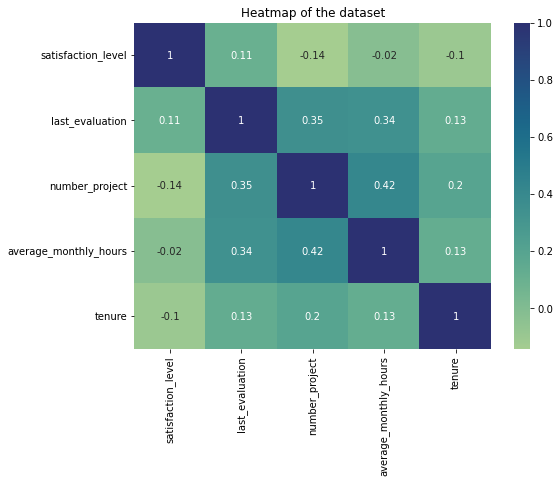

In [30]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df1[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [31]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_lr = df1[(df1['tenure'] >= lower_limit) & (df1['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_lr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
# Isolate the outcome variable
y = df_lr['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [33]:
# Select the features you want to use in your model
X = df_lr.drop(['left','work_accident'], axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
df_lr['salary'].value_counts()

0    6831
1    5824
2    1062
Name: salary, dtype: int64

In [35]:
# Split the data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [36]:
# Construct a logistic regression model and fit it to the training dataset
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [37]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

In [38]:
# Create classification report for logistic regression model
from sklearn.metrics import classification_report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.85      0.90      0.87      2589
    Predicted would leave       0.62      0.49      0.55       841

                 accuracy                           0.80      3430
                macro avg       0.73      0.70      0.71      3430
             weighted avg       0.79      0.80      0.79      3430



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 80%, f1-score of 79% (all weighted averages), and accuracy of 80%.

# Building Decision Tree model

To check weather the accuracy score will imporve or not.

In [39]:
# Instantiate model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


dt = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
dt1 = GridSearchCV(dt, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [40]:
%%time
dt1.fit(X_train, y_train)

CPU times: user 4.19 s, sys: 0 ns, total: 4.19 s
Wall time: 4.19 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [41]:
# Check best parameters
dt1.best_params_

{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [42]:
# Check best AUC score on CV
dt1.best_score_

0.9817797994182685

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

In [43]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [44]:
# Get all CV scores
dt_cv_results = make_results('decision tree cv', dt1, 'auc')
dt_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.963798,0.939712,0.951576,0.976573,0.98178


Decision Tree model improved the accuracy score with 97% accuracy and 96% and 94% precision and recall score respectively.

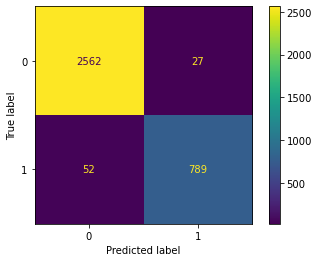

In [45]:
# Generate array of values for confusion matrix
preds = dt1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=dt1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt1.classes_)
disp.plot(values_format='')

The model predicts more false negative than false positive, which means that some employees may not be identified as at risk of quitting or getting fired, when that's actually the case. But this is still a strong model.


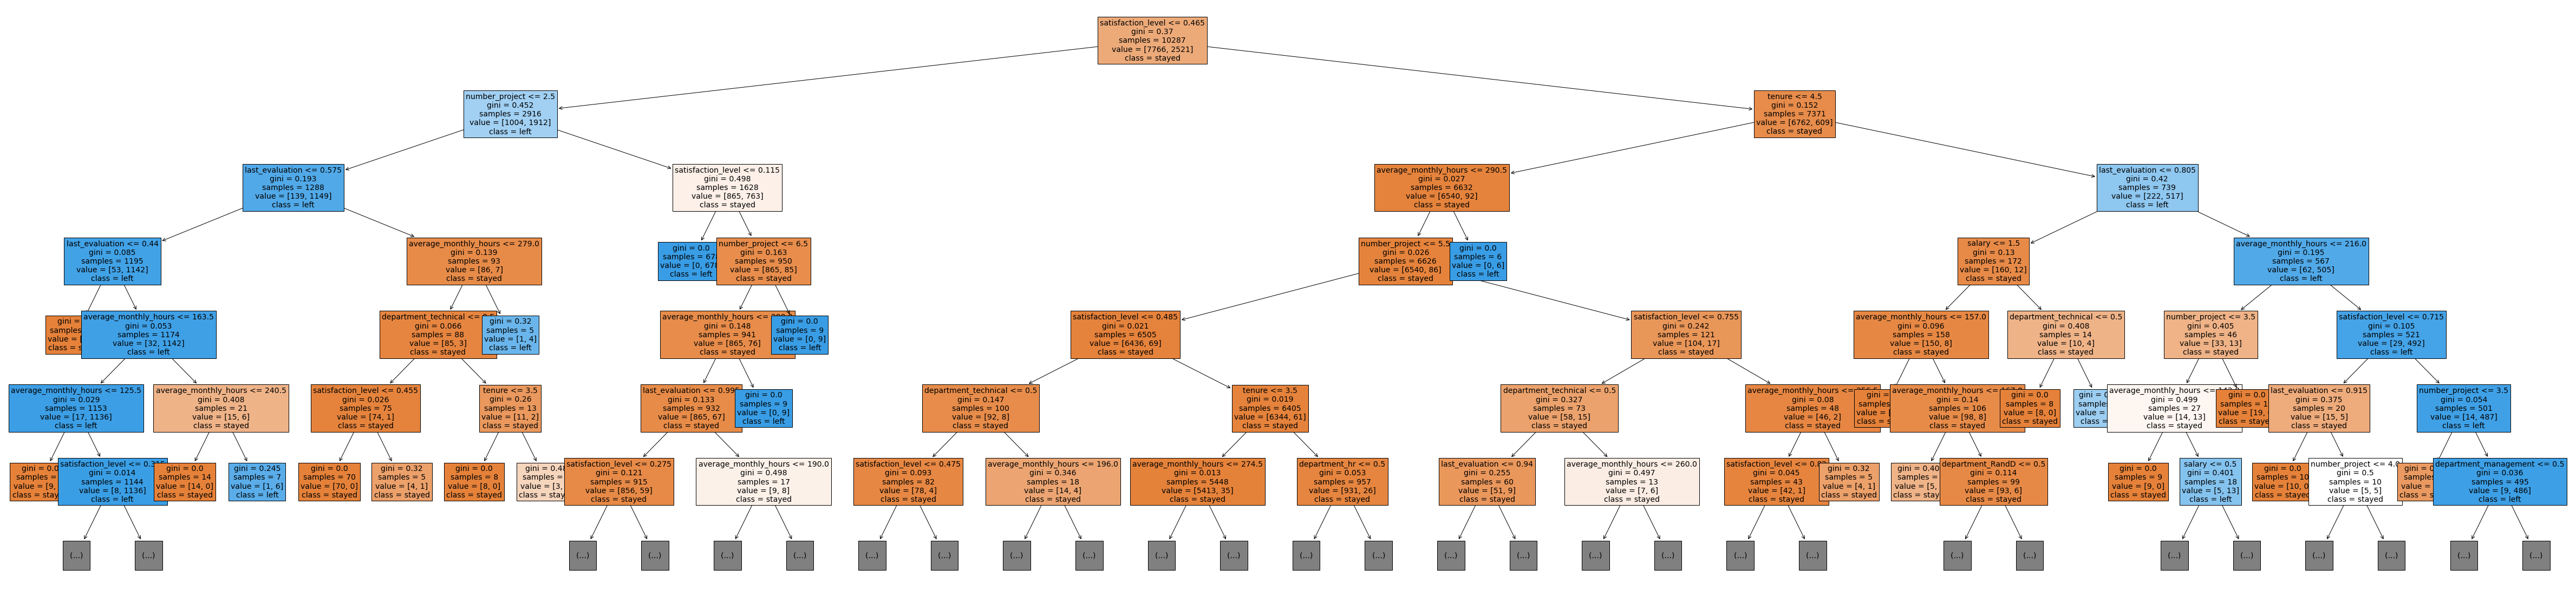

In [46]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(dt1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [47]:

dt_importances = pd.DataFrame(dt1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
dt_importances = dt_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
dt_importances = dt_importances[dt_importances['gini_importance'] != 0]
dt_importances

,gini_importance
satisfaction_level,0.579776
tenure,0.175720
last_evaluation,0.109221
number_project,0.082743
average_monthly_hours,0.044522
salary,0.002407
department_technical,0.002114
department_sales,0.001581
department_marketing,0.000818
department_hr,0.000394


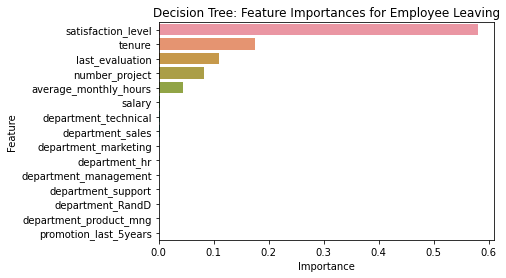

In [48]:
sns.barplot(data=dt_importances, x="gini_importance", y=dt_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, last_evaluation, number_project, tenure,satisfaction level, and average monthly hours have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression** model achieved 80% accuracy with 79% of precision score, 80% of recall score and 79% of f1-score.

**Decision Tree Classsifier** model achieved AUC of 98%, precision of 96%, recall of 94%, f1-score of 95%, and accuracy of 97%, on the test set.

### Conclusion, Recommendations, Next Steps

To retain employees, the following are the recommendations to the stakeholders:

1. The number of projects that employees can work on should range from 3 to 4 and maximun 5.


2. Consider promoting employees who have been with the company for atleast four years.


3. Either reward employees for working longer hours, or don't require them to do so.


4. If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.


5. Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.


6. High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.